In [2]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot') #стиль графиков

In [3]:
%matplotlib inline

In [4]:
# data:
df = pd.read_csv('youtube_data_short.csv', sep = '\t')
df.head()

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,24.0,0.0,1141
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",NaN,690.0,10532.0,popsa,лазарев,2221419.0,NaN,NaN,3217
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",26.0,10.0,269.0,popsa,лазарев,40327.0,23.0,0.0,3546
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",12.0,7.0,163.0,popsa,лазарев,11907.0,11.0,0.0,3189
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",46.0,19.0,597.0,popsa,лазарев,91483.0,33.0,1.0,3361


Сколько наблюдений в таблице?

In [5]:
df.shape #w, h

(19124, 10)

In [6]:
df.size #w * h

191240

Сколько уникальных исполнителей встречается в данных?

In [7]:
len(df.performer.unique()) # уникальные значения

111

In [8]:
df.performer.unique().shape

(111,)

Вывести троих исполнителей, у которых в данных больше всего клипов.

In [9]:
list(df.performer.value_counts()[:3].index) #values

['николаев', 'валерия', 'михайлов']

Какая доля клипов приходится на реп?

In [10]:
(df.music_style == 'rap').mean()

0.10604476051035348

 Какая доля приходится на разные жанры?

In [11]:
df.music_style.value_counts()/df.shape[0]

rock       0.307885
estrada    0.217057
popsa      0.174597
shanson    0.107770
rap        0.106045
indi       0.071063
classic    0.015583
Name: music_style, dtype: float64

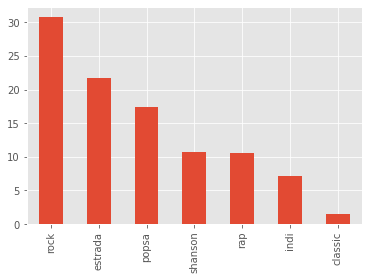

In [12]:
y = 100*df.music_style.value_counts()/df.shape[0]
y.plot(kind='bar');

Сколько исполнителей пишут свою музыку сразу в нескольких жанрах?

In [13]:
df_agg = df.groupby('performer')['music_style'].agg('nunique') 
df_agg[df_agg != 1].count()

0

Сколько в среднем просмотров под видео с likeCount > 100000 и commentators_uniq > 50?

In [25]:
df_res = df[(df.likeCount > 100000)&(df.commentators_uniq > 50)]

In [26]:
df_res.shape

(214, 10)

In [28]:
df_res.viewCount.mean()

39326558.901869155

Вывести 5% самых популярных исполнителей. В качестве меры популярности использовать разность между медианным числом лайков и дислайков. Оценку популярности строить только по исполнителям, собравшим в сумме больше 100000 лайков

In [37]:
df_r = df[df.likeCount > 100000]
df_agg = df_r.groupby('performer')[['likeCount', 'dislikeCount']].median()

In [38]:
df_agg['popularity'] = df_agg['likeCount'] - df_agg['dislikeCount']
df_agg.head()


,likeCount,dislikeCount,popularity
performer,,,
2маши,212909.0,24583.0,188326.0
classical_channel,271070.5,10307.5,260763.0
face,405493.0,54433.0,351060.0
feduk,381360.0,44912.0,336448.0
gazgolder,192971.0,16075.0,176896.0


In [40]:
q = df_agg.popularity.quantile(0.95)


In [47]:
df_agg[df_agg.popularity > q]['popularity'].sort_values(ascending=False)

performer
miyagi&эндшпиль    701683.0
face               351060.0
лсп                337350.0
Name: popularity, dtype: float64